<a href="https://colab.research.google.com/github/harshbelani/M.Tech-DS/blob/master/Deep_Learning/DL_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

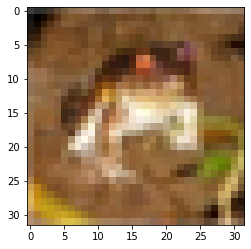

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

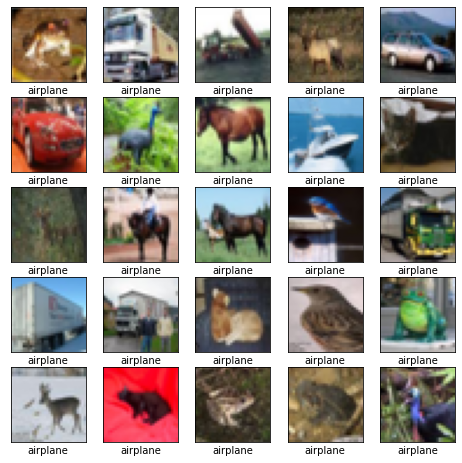

In [7]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.grid(False)
  plt.xlabel(class_names[int(train_labels[i][0])])
plt.show()

In [8]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          2

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7969 - accuracy: 0.7227 - val_loss: 0.9154 - val_accuracy: 0.6824
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7844 - accuracy: 0.7264 - val_loss: 0.8493 - val_accuracy: 0.7096
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7708 - accuracy: 0.7311 - val_loss: 1.6119 - val_accuracy: 0.5254
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7638 - accuracy: 0.7333 - val_loss: 0.7405 - val_accuracy: 0.7429
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7472 - accuracy: 0.7401 - val_loss: 0.8535 - val_accuracy: 0.7048
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7390 - accuracy: 0.7429 - val_loss: 0.8233 - val_accuracy: 0.7204
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7300 - accuracy: 0.7442 - val_loss: 0.7761 - val_ac

313/313 [==============================] - 1s 4ms/step - loss: 0.7828 - accuracy: 0.7315


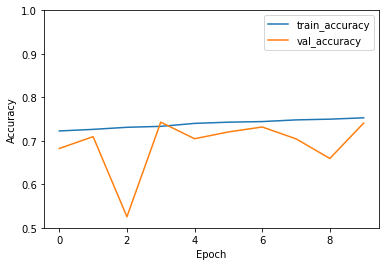

In [12]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=1)